## This notebook uses the saved results from the trained benchmarking models to reproduce Supplementary Fig. 4 


#### Load the chosen benchmarking model ( DeepSEA / DeepAtt / DanQ )
The saved model is available in this directory under the name `[model_name].h5`

##### Note about the test data used here for prediction performance :
The native test data in complex media is used for this benchmarking please look at Notebook 1 in this folder.


### Imports

In [38]:
import sys
sys.path.insert(0, './')

from rr_aux import *

### Load the results files for each model

In [42]:
benchmarking_model_list = ['DeepSEA' , 'DanQ' ,'DeepAtt','gpu', 'tpu']

both = 0

In [43]:
if both :
    pcc_dict = {}
    r2_dict = {}

    df_list = []
    for benchmarking_model in  benchmarking_model_list:
        df = pd.read_csv('../../../results_summary/Random_test_'+benchmarking_model+'_model.csv' , index_col = 0)
        df_list = df_list + [df]
        pcc_dict[benchmarking_model] = scipy.stats.pearsonr(df['Measured Expression'] , df['Predicted Expression'])[0]

    results_df_random = pd.DataFrame(list(pcc_dict.items()),columns = ['Model','Pearson correlation coefficient'])

    results_df_random = results_df_random.round(3)
    results_df_random['Test Dataset'] = 'Random'
    
pcc_dict = {}
r2_dict = {}

df_list = []
for benchmarking_model in  benchmarking_model_list:
    df = pd.read_csv('../../../results_summary/Native_allchunks_test_'+benchmarking_model+'_model.csv' , index_col = 0)
    df_list = df_list + [df]
    pcc_dict[benchmarking_model] = scipy.stats.pearsonr(df['Measured Expression'] , df['Predicted Expression'])[0]
    
results_df_native = pd.DataFrame(list(pcc_dict.items()),columns = ['Model','Pearson correlation coefficient'])

results_df_native = results_df_native.round(3)
results_df_native['Test Dataset'] = 'Native'



if both :
    
    results_df = results_df_native.append(results_df_random)
    
else : 
    results_df = results_df_native

In [44]:
results_df

,Model,Pearson correlation coefficient,Test Dataset
0,DeepSEA,0.928,Native
1,DanQ,0.942,Native
2,DeepAtt,0.943,Native
3,gpu,0.960,Native
4,tpu,0.963,Native


### Reproduce the barplot from Supplementary Figure 4

In [45]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

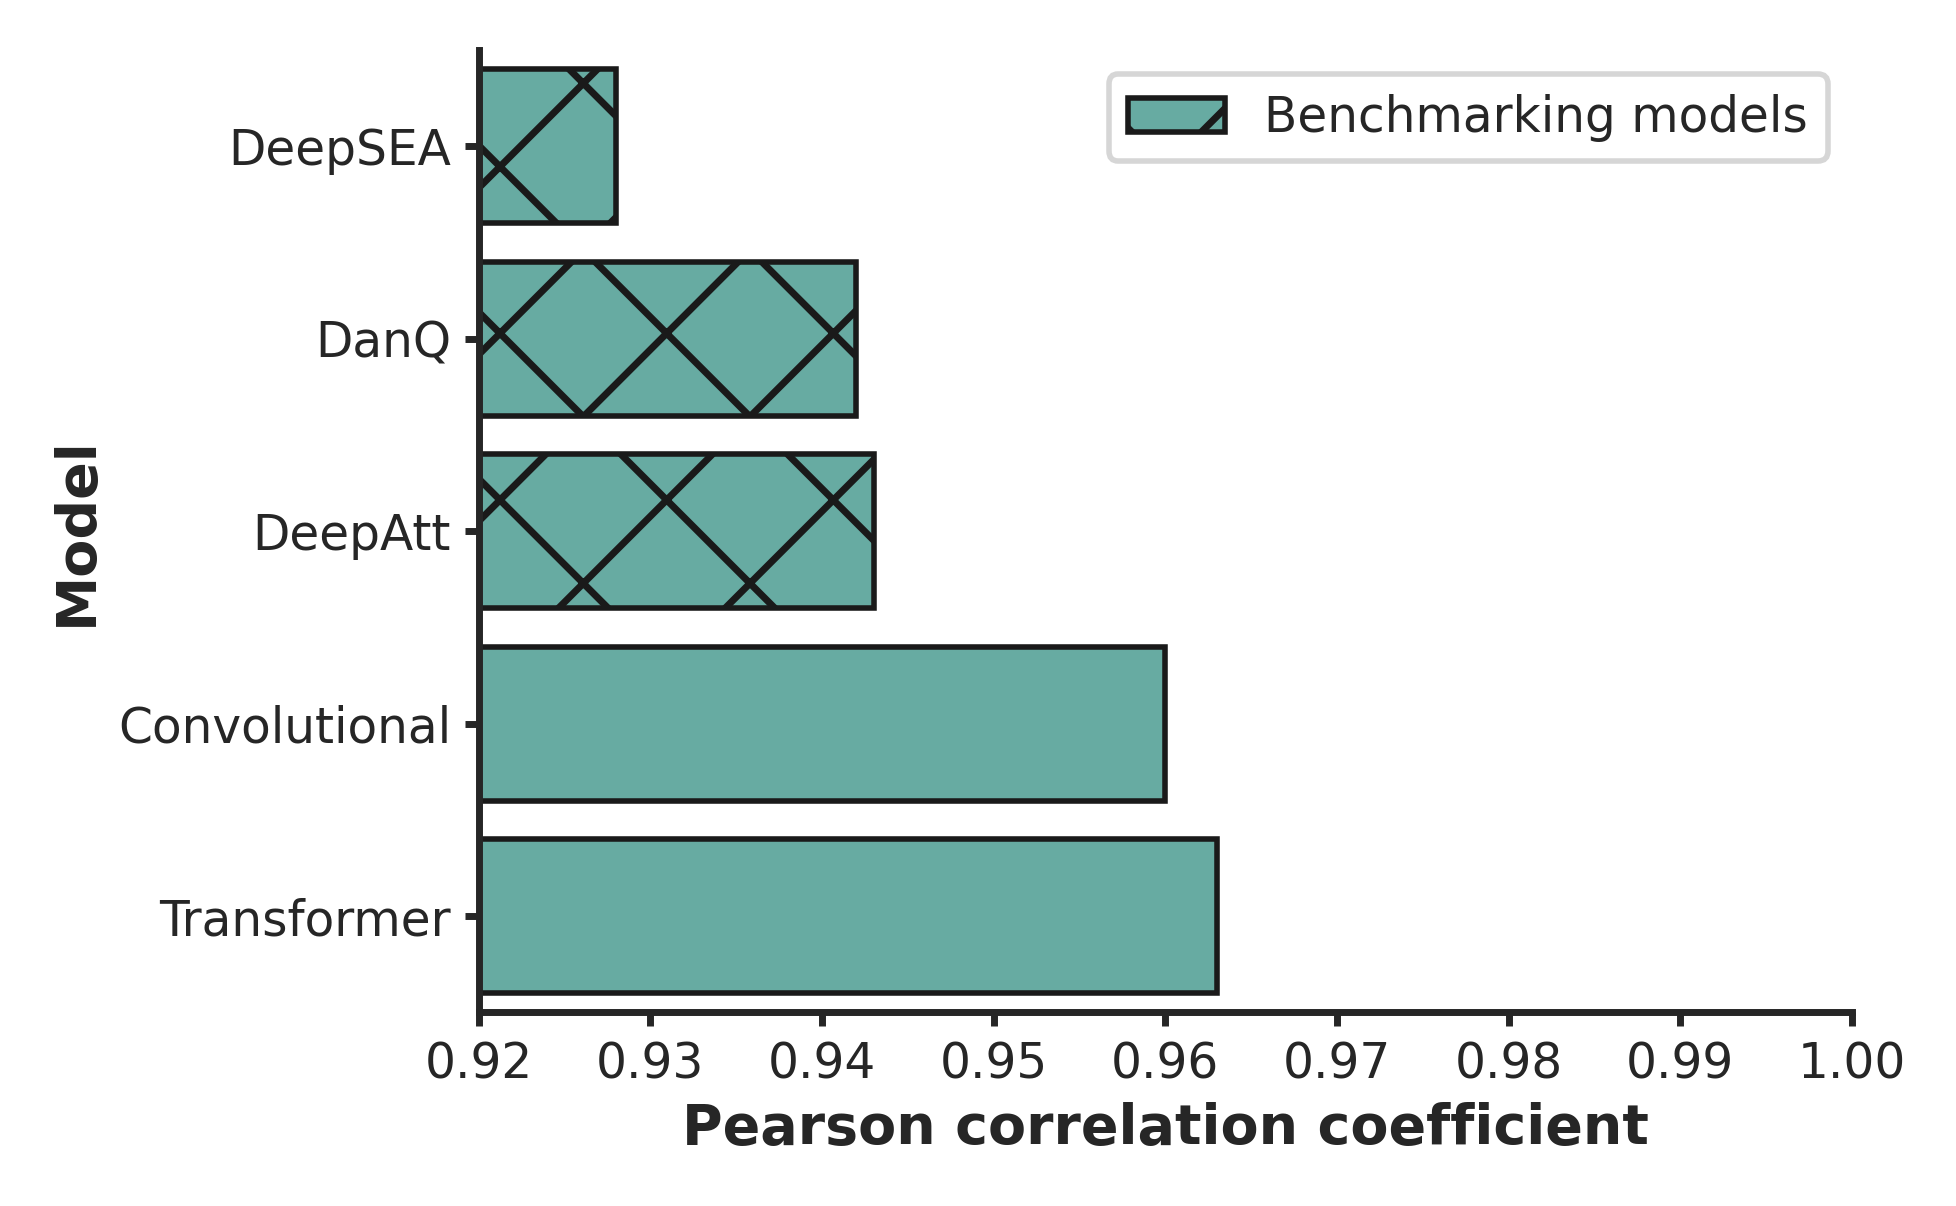

In [48]:
fig_file = "pcc_barplot"
fig=plt.figure(figsize=(4,4/1.6) , dpi= 500, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)


bar = sns.barplot(x="Pearson correlation coefficient", y="Model", data=results_df , 
            ci = None,edgecolor = 'k', color = (0.3600153787004998, 0.7161860822760476, 0.6655132641291811)) 


# Define some hatches
hatches = ['x', 'x', 'x', '', '', ]

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

    
ax = plt.gca()
ax.legend(['Benchmarking models'])


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')
#plt.setp(ax.lines, linewidth=1.5)

#ax.autoscale(enable=True, axis='x', tight=True)
#ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(xmin=0.92, xmax = 1)
ax.set_yticklabels(['DeepSEA' , 'DanQ' ,'DeepAtt','Convolutional', 'Transformer'])


plt.savefig("%s.svg" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()

### Reproduce the ECC scatterplots from Supplementary Fig. 4

In [25]:
benchmarking_model_list = ['DeepAtt' , 'DeepSEA' , 'DanQ' ]
df_dict = {}
df_dict['Our model'] = pd.read_csv('pro_df_analyzed.tsv', index_col = 0 , sep = '\t')
for benchmarking_model in  benchmarking_model_list:
    df = pd.read_csv(benchmarking_model+"_model_pro_df_analyzed.tsv" , index_col = 0 , sep = '\t')
    df_dict[benchmarking_model] = df

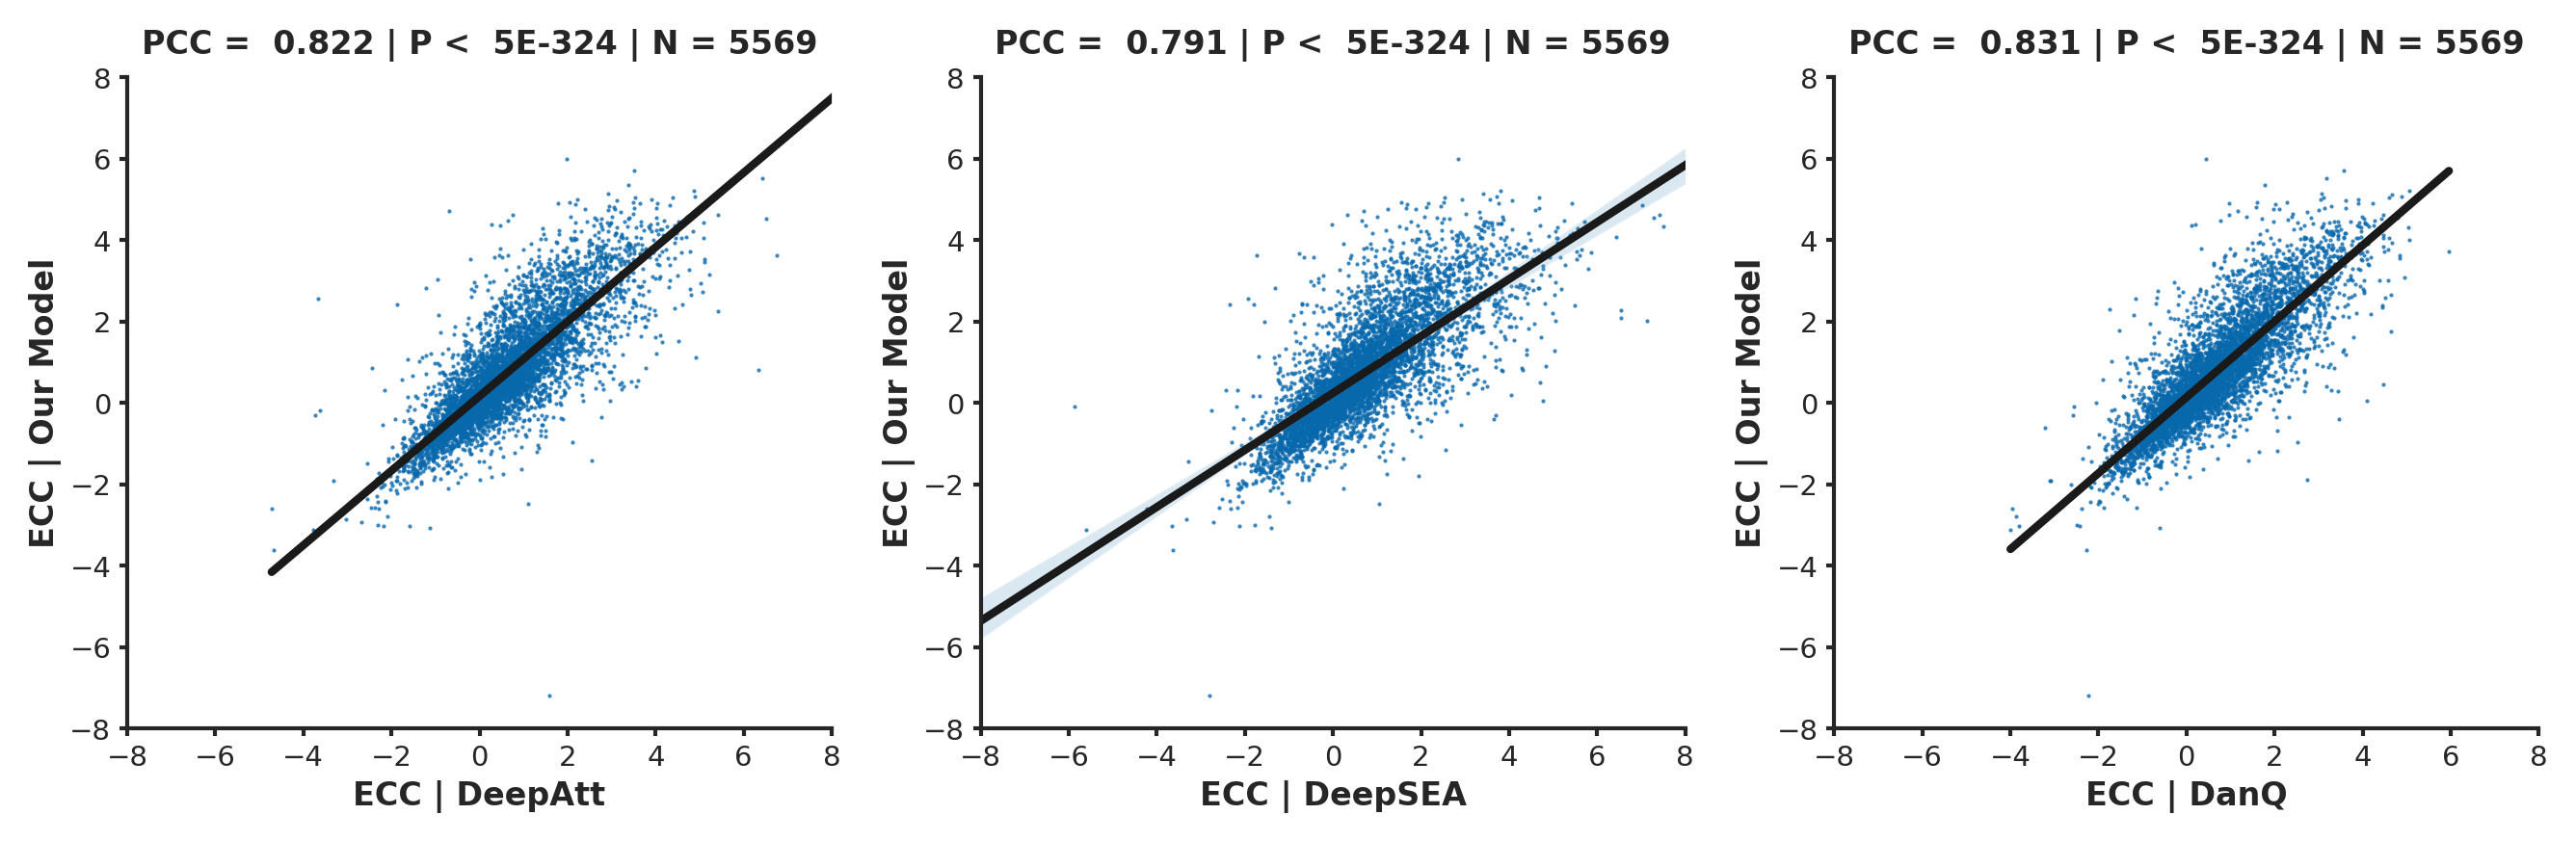

In [26]:
fig_file = "ecc_plot"

fig=plt.figure(figsize=(9,9/3) , dpi= 300, facecolor='w', edgecolor='k')
fig.tight_layout(pad = 1)



plt.subplot(1, 3, 1)

x = df_dict['DeepAtt']['log_ratio']
y = df_dict['Our model']['log_ratio']

r = scipy.stats.spearmanr(x ,y , nan_policy='omit')
sns.regplot(x=x ,y=y ,
            scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
            line_kws= {'linewidth':2} ,
            color= '#0868ac', robust = 1 )



ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel("ECC | DeepAtt")
ax.set_ylabel("ECC | Our Model")
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')
#plt.setp(ax.lines, linewidth=1.5)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(xmin=-8,xmax=8)
ax.set_ylim(ymin=-8,ymax=8)



plt.subplot(1, 3, 2)

x = df_dict['DeepSEA']['log_ratio']
y = df_dict['Our model']['log_ratio']

r = scipy.stats.spearmanr(x ,y , nan_policy='omit')
sns.regplot(x=x ,y=y ,
            scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
            line_kws= {'linewidth':2} ,
            color= '#0868ac' , robust = 1)



ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel("ECC | DeepSEA")
ax.set_ylabel("ECC | Our Model")
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')
#plt.setp(ax.lines, linewidth=1.5)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(xmin=-8,xmax=8)
ax.set_ylim(ymin=-8,ymax=8)



plt.subplot(1, 3, 3)

x = df_dict['DanQ']['log_ratio']
y = df_dict['Our model']['log_ratio']
r = scipy.stats.spearmanr(x ,y , nan_policy='omit')
sns.regplot(x=x ,y=y ,
            scatter_kws= {'s':1,'linewidth':0, 'rasterized':True} ,
            line_kws= {'linewidth':2} ,
            color= '#0868ac' , robust = 1)



ax = plt.gca()
#ax.get_legend().remove()


ax.set_xlabel("ECC | DanQ")
ax.set_ylabel("ECC | Our Model")
if (r[1] ==0.0) :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P < {np.nextafter(0, 1) : 0.0E} | N = {len(x)}"  )
else :
    ax.set_title(f"PCC = {r[0] : 0.3f} | P = {r[1] : 0.2E} | N = {len(x)}"  )


plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')
#plt.setp(ax.lines, linewidth=1.5)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
#ax.set_xlim(xmin=-14,xmax=6)
#ax.set_ylim(ymin=0,ymax=1.05)





plt.setp(ax.artists, edgecolor = 'k')
plt.setp(ax.lines, color='k')
#plt.setp(ax.lines, linewidth=1.5)

ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim(xmin=-8,xmax=8)
ax.set_ylim(ymin=-8,ymax=8)








plt.savefig("%s.svg" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.pdf" % (fig_file,), bbox_inches="tight")
plt.savefig("%s.png" % (fig_file,), bbox_inches="tight")

plt.show()